In [54]:
import numpy as np
import os
from PIL import Image
import struct
import scipy
import scipy.misc
import scipy.cluster
import matplotlib.pyplot as plt
import matplotlib.patches as patches
% matplotlib inline

In [14]:
#Absolute folder of images
im_dir = '/Users/noon/Pictures/Pictures by me/'
os.chdir(im_dir)

In [15]:
# Access all PNG files in directory
allfiles=os.listdir(im_dir)
imlist=[filename for filename in allfiles if  filename[-4:] in [".png",".PNG"]]

In [21]:


# Assuming all images are the same size, get dimensions of first image
max_w = max(Image.open(im).size[0] for im in imlist)
max_h = max(Image.open(im).size[1] for im in imlist)
print max_w, max_h
N=len(imlist)

# Create a numpy array of floats to store the average (assume RGB images)
arr=np.zeros((max_h,max_w,3),np.float)

# Build up average pixel intensities, casting each image as an array of floats
for im in imlist:
    imarr=np.array(Image.open(im),dtype=np.float)
    arr=arr+imarr/N

# Round values in array and cast as 8-bit integer
arr=np.array(numpy.round(arr),dtype=np.uint8)

# Generate, save and preview final image
out=Image.fromarray(arr,mode="RGB")
out.save("Average.png")
out.show()


6000 9000


ValueError: operands could not be broadcast together with shapes (9000,6000,3) (600,800,3) 

In [45]:
def get_average_color(im_fname, num_clusters=5,resize_w=150):
    print 'reading image ' + im_fname
    im = Image.open(im_fname)
    w, h = im.size
    ratio = w*1.0/500
    new_w = int(round(w/ratio))
    new_h = int(round(h/ratio))
    im = im.resize((new_w, new_h))     
    ar = scipy.misc.fromimage(im)
    shape = ar.shape
    ar = ar.reshape(scipy.product(shape[:2]), shape[2]).astype('float')
    codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)
    vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
    counts, bins = scipy.histogram(vecs, len(codes))    # count occurrences
    index_max = scipy.argmax(counts)                    # find most frequent
    peak = codes[index_max]
    peak = peak.astype(int)
    colour = ''.join(chr(c) for c in peak).encode('hex')[0:6]
    print 'most frequent is %s (#%s)' % (peak, colour)
    return colour

reading image "ART".png
most frequent is [250 252 252] (#fafcfc)


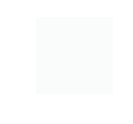

reading image 17th century population growth.png
most frequent is [254 254 254] (#fefefe)


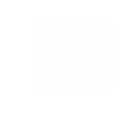

reading image ?_____?.png
most frequent is [ 17 193 160 255] (#11c1a0)


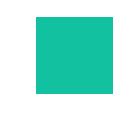

reading image ab.jpg
most frequent is [42 56 85] (#2a3855)


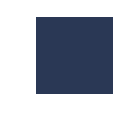

reading image accidents.jpg
most frequent is [6 2 1] (#060201)


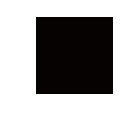

reading image ahappy 39th bird.png
most frequent is [254 254 254] (#fefefe)


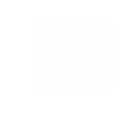

reading image alex and his fucking guitar.png
most frequent is [0 0 0 0] (#000000)


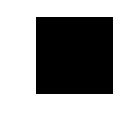

reading image alicia and capy small.png
most frequent is [0 0 0 0] (#000000)


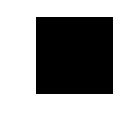

reading image alicia and capy.png
most frequent is [0 0 0 0] (#000000)


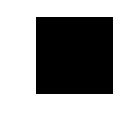

reading image alicia.png
most frequent is [211 199 192] (#d3c7c0)


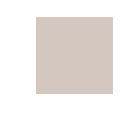

reading image amazing.png
most frequent is [235 238 243] (#ebeef3)


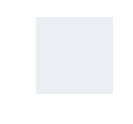

reading image amnesinoon.png
most frequent is [14  9 17] (#0e0911)


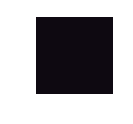

reading image ann eats poop.png
most frequent is [207  67  53] (#cf4335)


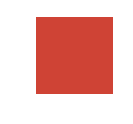

reading image ann falls.png
most frequent is [0 0 0 0] (#000000)


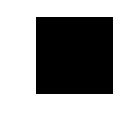

reading image ap art 5 2010-2011 019.png
most frequent is [168 169 169] (#a8a9a9)


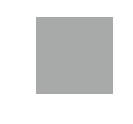

reading image ap art 5 2010-2011 020.png
most frequent is [113 112 112] (#717070)


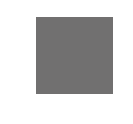

reading image apogee.png
most frequent is [254 254 254] (#fefefe)


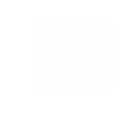

reading image armchair.jpg
most frequent is [0 0 0] (#000000)


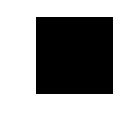

reading image art.png
most frequent is [241 142 174] (#f18eae)


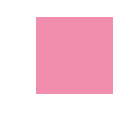

reading image asd.png
most frequent is [0 0 0 0] (#000000)


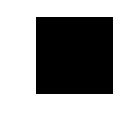

reading image ashley.png
most frequent is [126 117 147] (#7e7593)


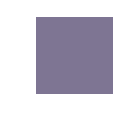

reading image baby bison.jpg
most frequent is [146 146 141] (#92928d)


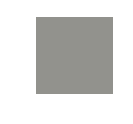

reading image bad.png
most frequent is [253 253 252] (#fdfdfc)


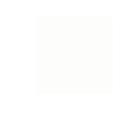

reading image ben.png
most frequent is [254 254 254] (#fefefe)


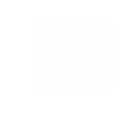

reading image bio.png


KeyboardInterrupt: 

In [55]:
# Access all PNG files in directory
allfiles=os.listdir(im_dir)
imlist = []
for filename in allfiles:
    if filename[-4:] in [".png",".PNG"] or filename[-4:] in [".jpg",".JPG"] or filename[-5:] in [".jpeg",".JPEG"]:
        imlist.append(filename)
hexes = []
for im in imlist:
    hexcode = get_average_color(im)
    hexes.append(hexcode)
    fig1 = plt.figure(figsize=(1,1))
    ax1 = fig1.add_subplot(111, aspect='equal')
    ax1.add_patch(
        patches.Rectangle(
            (0, 0),   # (x,y)
            1,          # width
            1,          # height
            facecolor = '#'+str(hexcode),
            edgecolor = "none"
        )
    )
    plt.axis('off')
    plt.show()

In [43]:
#getting avg color of image

NUM_CLUSTERS = 5
resize_w = 500

print 'reading image'
im = Image.open('runt in the sink.png')
w, h = im.size
ratio = w*1.0/500
new_w = int(round(w/ratio))
new_h = int(round(h/ratio))
print new_w, new_h
im = im.resize((new_w, new_h))     
ar = scipy.misc.fromimage(im)
shape = ar.shape
ar = ar.reshape(scipy.product(shape[:2]), shape[2]).astype('float')
print 'finding clusters'
codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)
print 'cluster centres:\n', codes

vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
counts, bins = scipy.histogram(vecs, len(codes))    # count occurrences

index_max = scipy.argmax(counts)                    # find most frequent
peak = codes[index_max]
peak = peak.astype(int)
print 'peaks are ', peak

colour = ''.join(chr(c) for c in peak).encode('hex')[0:6]
print 'most frequent is %s (#%s)' % (peak, colour)

reading image
500 292
finding clusters
cluster centres:
[[ 253.30979221  224.40719174  192.66885654  255.        ]
 [ 221.44868841  109.40371322  128.0340748   255.        ]
 [ 123.12611687  152.65582559  158.5630361   255.        ]
 [ 215.46752242  178.64131612  182.19080575  255.        ]
 [ 254.42946941  242.0363439   228.59973142  255.        ]]
peaks are  [253 224 192 255]
most frequent is [253 224 192 255] (#fde0c0f)
